Import libraries - run this first.

In [2]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop, Nadam

from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

from google.colab import files

Run this cell to import each of the files mentioned below

In [4]:
uploaded = files.upload()

Saving fiber_density_train_labels.npz to fiber_density_train_labels.npz
Saving fiber_density_test_labels.npz to fiber_density_test_labels.npz
Saving fiber_density_test.npz to fiber_density_test.npz
Saving fiber_density_train.npz to fiber_density_train.npz


In [ ]:
x_train = np.load('fiber_density_train.npz')['arr_0']
x_test = np.load('fiber_density_test.npz')['arr_0']
y_train = np.load('fiber_density_train_labels.npz')['arr_0']
y_test = np.load('fiber_density_test_labels.npz')['arr_0']
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8)

Display some images in dataset

In [ ]:
for i in range(0,200,25):
    fig,ax = plt.subplots(ncols=5)
    for j in range(5):
        ax[j].imshow(x_test[i+j*4])

for i in range(0,1750,200):
    fig,ax = plt.subplots(ncols=5)
    for j in range(5):
        ax[j].imshow(x_train[i+j*4])

Check data shape

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(np.amax(x_train),np.amax(x_test))

(1750, 64, 64, 3) (200, 64, 64, 3)
(1750, 8) (200, 8)
1.0 1.0


In [ ]:
def dense_model(input_shape=(784,)):
  model = tf.keras.models.Sequential()
  model.add(Dense(500, input_shape=input_shape, activation='relu'))
  model.add(Dense(500, activation='relu'))
  model.add(Dense(8, activation='softmax'))
  return model

In [ ]:
model = dense_model()
model.summary()
opt = RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
def cnn_model(input_shape=(28,28,1)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=input_shape))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(8, activation='softmax'))
  return model

In [ ]:
model = cnn_model()
model.summary()
opt = RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(np.amax(x_train),np.amax(x_test))

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs =  20, 
    validation_data=(x_test, y_test),
    batch_size=128, 
    verbose = 1,
)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Plot results


In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')

**DENSE NETWORK CELL.**
Include all the code necessary to read the data, perform necessary data transformations (and optionally aumentations), create the network and train it.
We will evaluate the network with a private test set. 
**THIS CELL MUST NOT DEPEND ON RUNNING ANY OTHER CELLS - VIEW IT AS A STAND-ALONE PROGRAM**

In [5]:
x_train = np.load('fiber_density_train.npz')['arr_0']
x_test = np.load('fiber_density_test.npz')['arr_0']
y_train = np.load('fiber_density_train_labels.npz')['arr_0']
y_test = np.load('fiber_density_test_labels.npz')['arr_0']
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8)

In [67]:
#Include all your code here
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

def dense_model(input_shape=(12288,)):
  model = tf.keras.models.Sequential()
  model.add(Dense(10000, input_shape=input_shape, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(5000, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1000, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(8, activation='softmax'))
  return model

model = dense_model()
model.summary()
opt = Adam(learning_rate=0.000005)#RMSprop(lr=0.000005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

ResourceExhaustedError: ignored

In [66]:
history = model.fit(
    x_train, y_train,
    epochs =  20, 
    validation_data=(x_test, y_test),
    batch_size=64, 
    verbose = 1,
)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/20
28/28 [==============================] - 2s 51ms/step - loss: 2.0046 - accuracy: 0.1572 - val_loss: 1.7636 - val_accuracy: 0.3650
Epoch 2/20
28/28 [==============================] - 1s 45ms/step - loss: 1.7115 - accuracy: 0.3293 - val_loss: 1.5911 - val_accuracy: 0.3750
Epoch 3/20
28/28 [==============================] - 1s 44ms/step - loss: 1.5572 - accuracy: 0.3918 - val_loss: 1.4727 - val_accuracy: 0.4750
Epoch 4/20
28/28 [==============================] - 1s 45ms/step - loss: 1.4259 - accuracy: 0.4583 - val_loss: 1.3993 - val_accuracy: 0.4800
Epoch 5/20
28/28 [==============================] - 1s 45ms/step - loss: 1.3138 - accuracy: 0.5006 - val_loss: 1.3278 - val_accuracy: 0.5400
Epoch 6/20
28/28 [==============================] - 1s 44ms/step - loss: 1.2238 - accuracy: 0.5686 - val_loss: 1.2839 - val_accuracy: 0.5700
Epoch 7/20
28/28 [==============================] - 1s 45ms/step - loss: 1.1648 - accuracy: 0.5743 - val_loss: 1.2205 - val_accuracy: 0.6300
Epoch 8/20
28

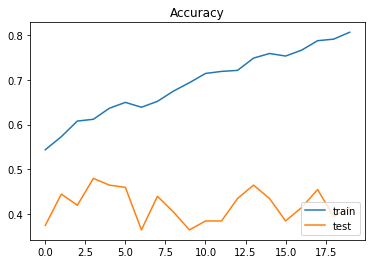

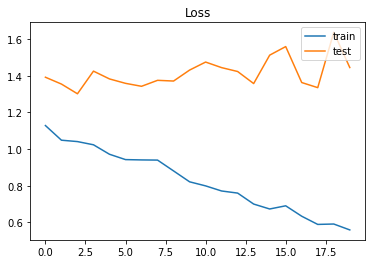

In [39]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')

**CNN CELL.** Include all the code necessary to read the data, perform necessary data transformations (and optionally aumentations), create the network and train it.
We will evaluate the network with a private test set. 
**THIS CELL MUST NOT DEPEND ON RUNNING ANY OTHER CELLS - VIEW IT AS A STAND-ALONE PROGRAM**

In [ ]:
x_train = np.load('fiber_density_train.npz')['arr_0']
x_test = np.load('fiber_density_test.npz')['arr_0']
y_train = np.load('fiber_density_train_labels.npz')['arr_0']
y_test = np.load('fiber_density_test_labels.npz')['arr_0']
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8)


#Include all your code here
def cnn_model(input_shape=(64,64,3)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=input_shape))
  model.add(Dropout(.05))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(Dropout(.05))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Dropout(.05))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(.05))
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(8, activation='softmax'))
  return model

model = cnn_model()
model.summary()
opt = Adam(learning_rate=0.0001)#RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
dropout_70 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
dropout_71 (Dropout)         (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_72 (Dropout)         (None, 28, 28, 64)      

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs =  20, 
    validation_data=(x_test, y_test),
    batch_size=128, 
    verbose = 1,
)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/20
14/14 [==============================] - 1s 52ms/step - loss: 0.3119 - accuracy: 0.8783 - val_loss: 0.5086 - val_accuracy: 0.7850
Epoch 2/20
14/14 [==============================] - 1s 47ms/step - loss: 0.2978 - accuracy: 0.9000 - val_loss: 0.4223 - val_accuracy: 0.8350
Epoch 3/20
14/14 [==============================] - 1s 48ms/step - loss: 0.2895 - accuracy: 0.8994 - val_loss: 0.4814 - val_accuracy: 0.8000
Epoch 4/20
14/14 [==============================] - 1s 46ms/step - loss: 0.2760 - accuracy: 0.9057 - val_loss: 0.4115 - val_accuracy: 0.8250
Epoch 5/20
14/14 [==============================] - 1s 46ms/step - loss: 0.2612 - accuracy: 0.9103 - val_loss: 0.4933 - val_accuracy: 0.8050
Epoch 6/20
14/14 [==============================] - 1s 47ms/step - loss: 0.2651 - accuracy: 0.9126 - val_loss: 0.4473 - val_accuracy: 0.8300
Epoch 7/20
14/14 [==============================] - 1s 46ms/step - loss: 0.2600 - accuracy: 0.9046 - val_loss: 0.3898 - val_accuracy: 0.8400
Epoch 8/20
14

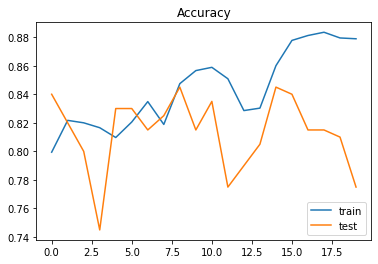

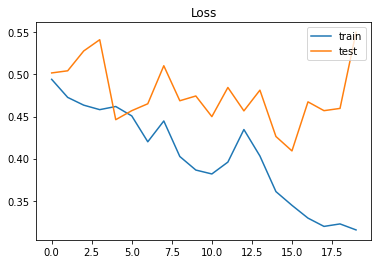

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')

We will run this cell to evaluate you models after they have been trained

In [ ]:
x_test_private = np.load('fiber_density_test_private.npz')['arr_0']
y_test_private = np.load('fiber_density_test_private_labels.npz')['arr_0']

x_test_private = np.load('fiber_density_test.npz')['arr_0']
y_test_private = tf.keras.utils.to_categorical(np.load('fiber_density_test_labels.npz')['arr_0'], num_classes=8)

model.evaluate(x_test_private,y_test_private)